In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
train_df = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

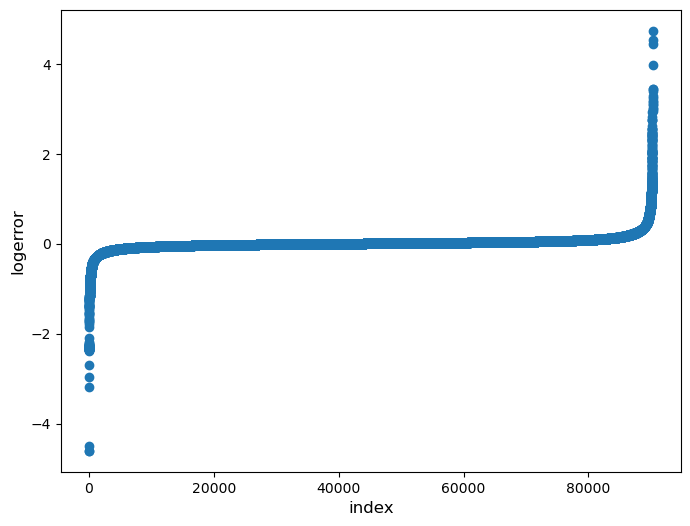

In [2]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/3721388390.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.logerror.values, bins=50, kde=False)


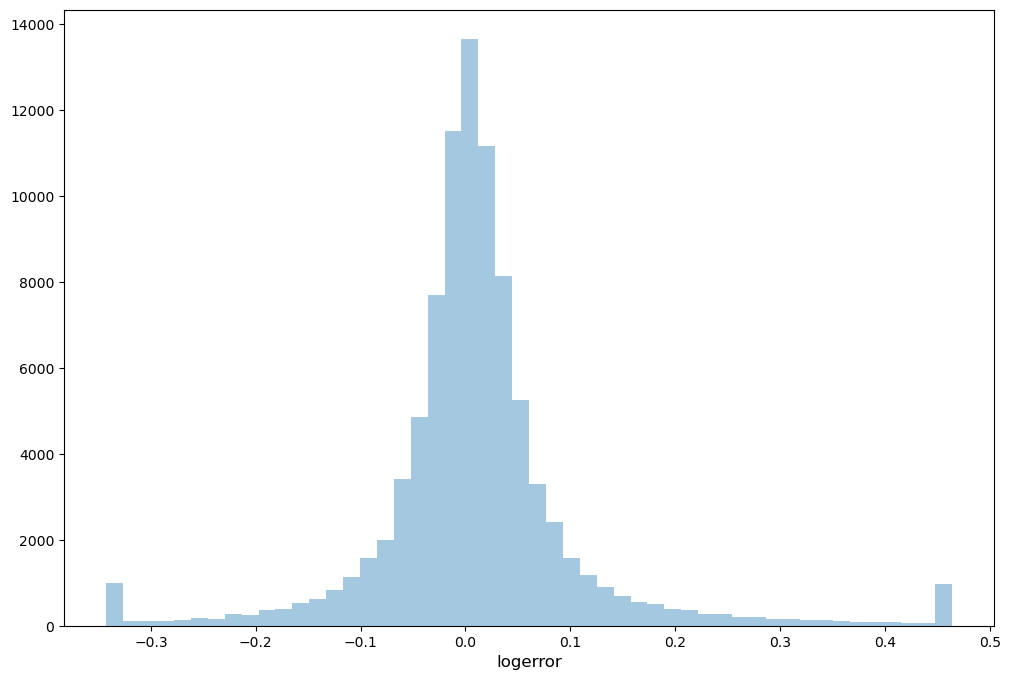

In [3]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df.loc[train_df['logerror']>ulimit, 'logerror'] = ulimit
train_df.loc[train_df['logerror']<llimit, 'logerror'] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()


In [4]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [5]:
prop_df = pd.read_csv("properties_2016.csv")
prop_df.shape

/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/417159403.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv("properties_2016.csv")


(2985217, 58)

In [6]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


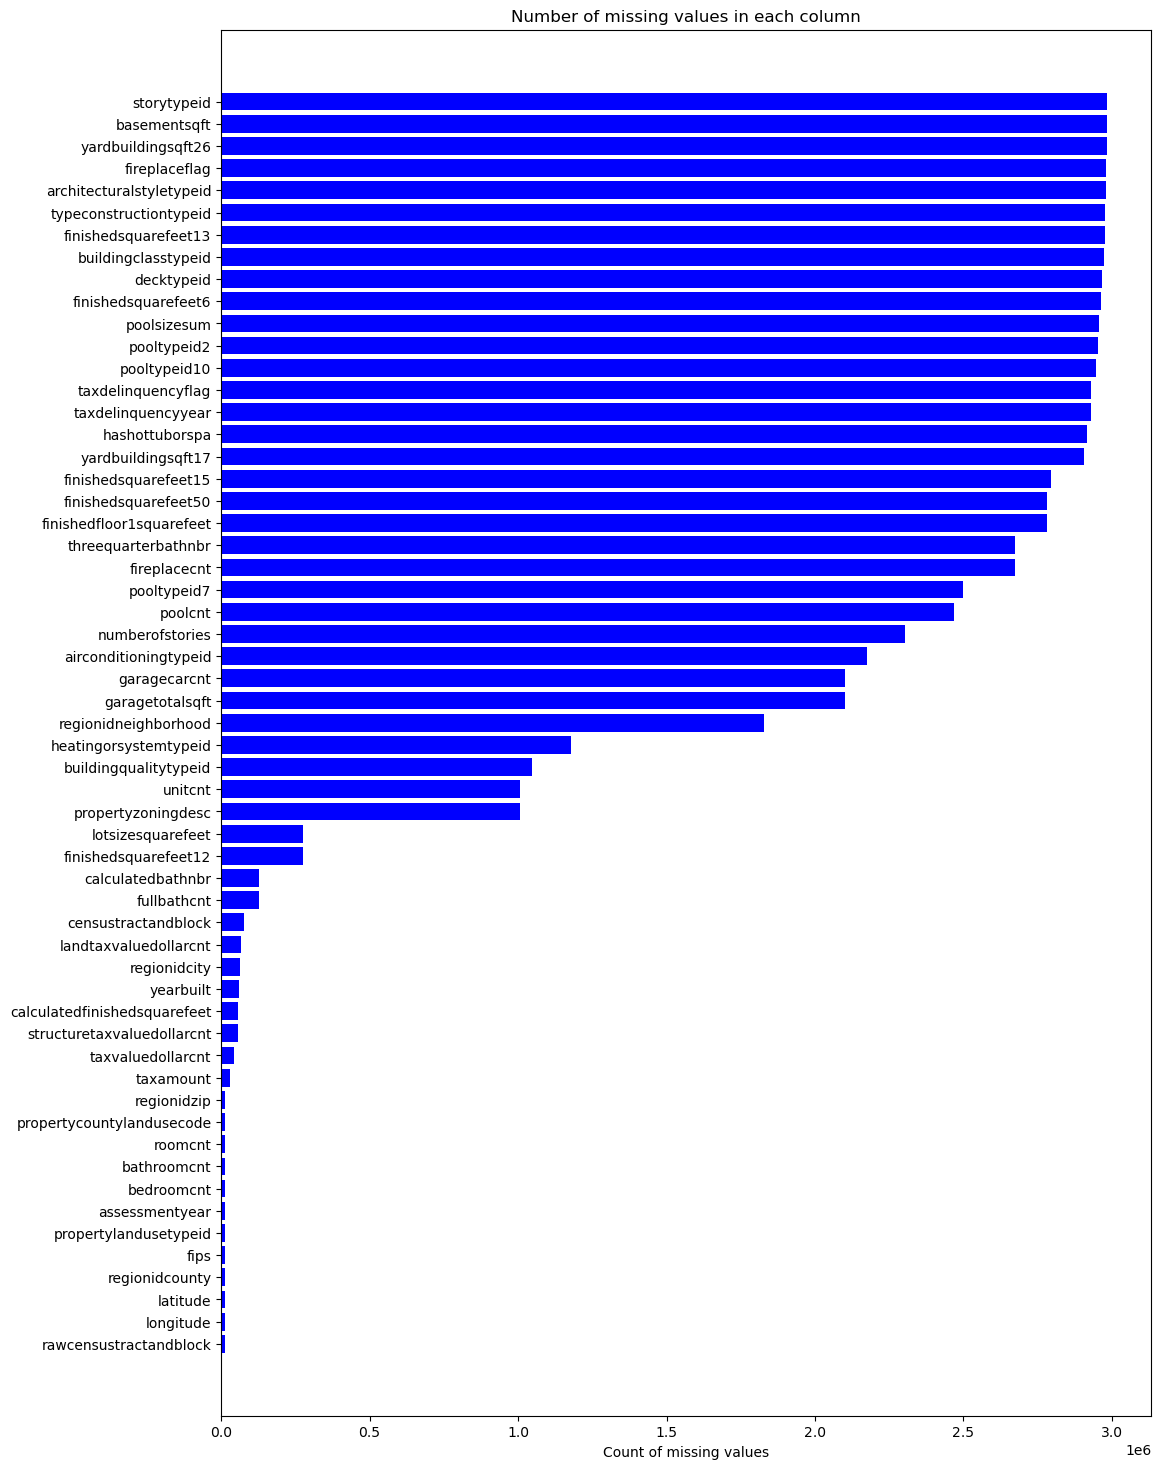

In [7]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()


<Figure size 1200x1200 with 0 Axes>

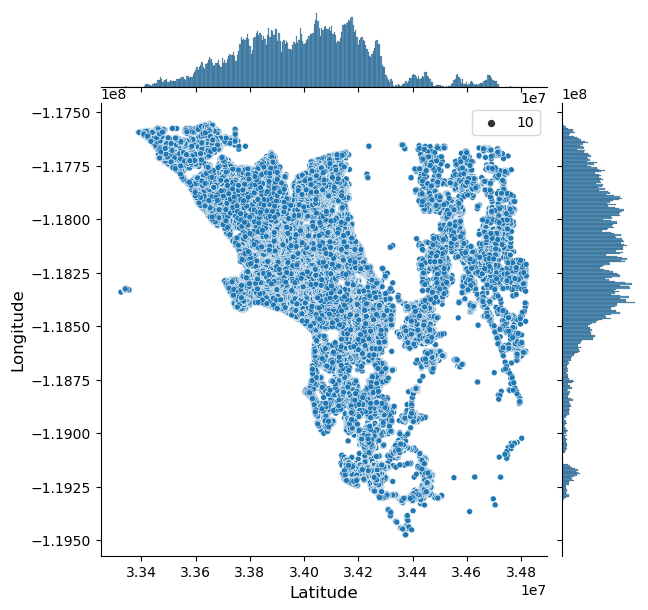

In [8]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [9]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [10]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,airconditioningtypeid,float64
4,architecturalstyletypeid,float64
5,basementsqft,float64
6,bathroomcnt,float64
7,bedroomcnt,float64
8,buildingclasstypeid,float64
9,buildingqualitytypeid,float64


In [11]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


In [12]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.loc[missing_df['missing_ratio'] > 0.999]

,column_name,missing_count,missing_ratio
5,basementsqft,90232,0.999524
8,buildingclasstypeid,90259,0.999823
15,finishedsquarefeet13,90242,0.999634
43,storytypeid,90232,0.999524


/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/904407522.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = train_df.mean(axis=0)
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/904407522.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = train_df.mean(axis=0)
/Users/rakeshkumardevagalla/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rakeshkumardevagalla/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[N

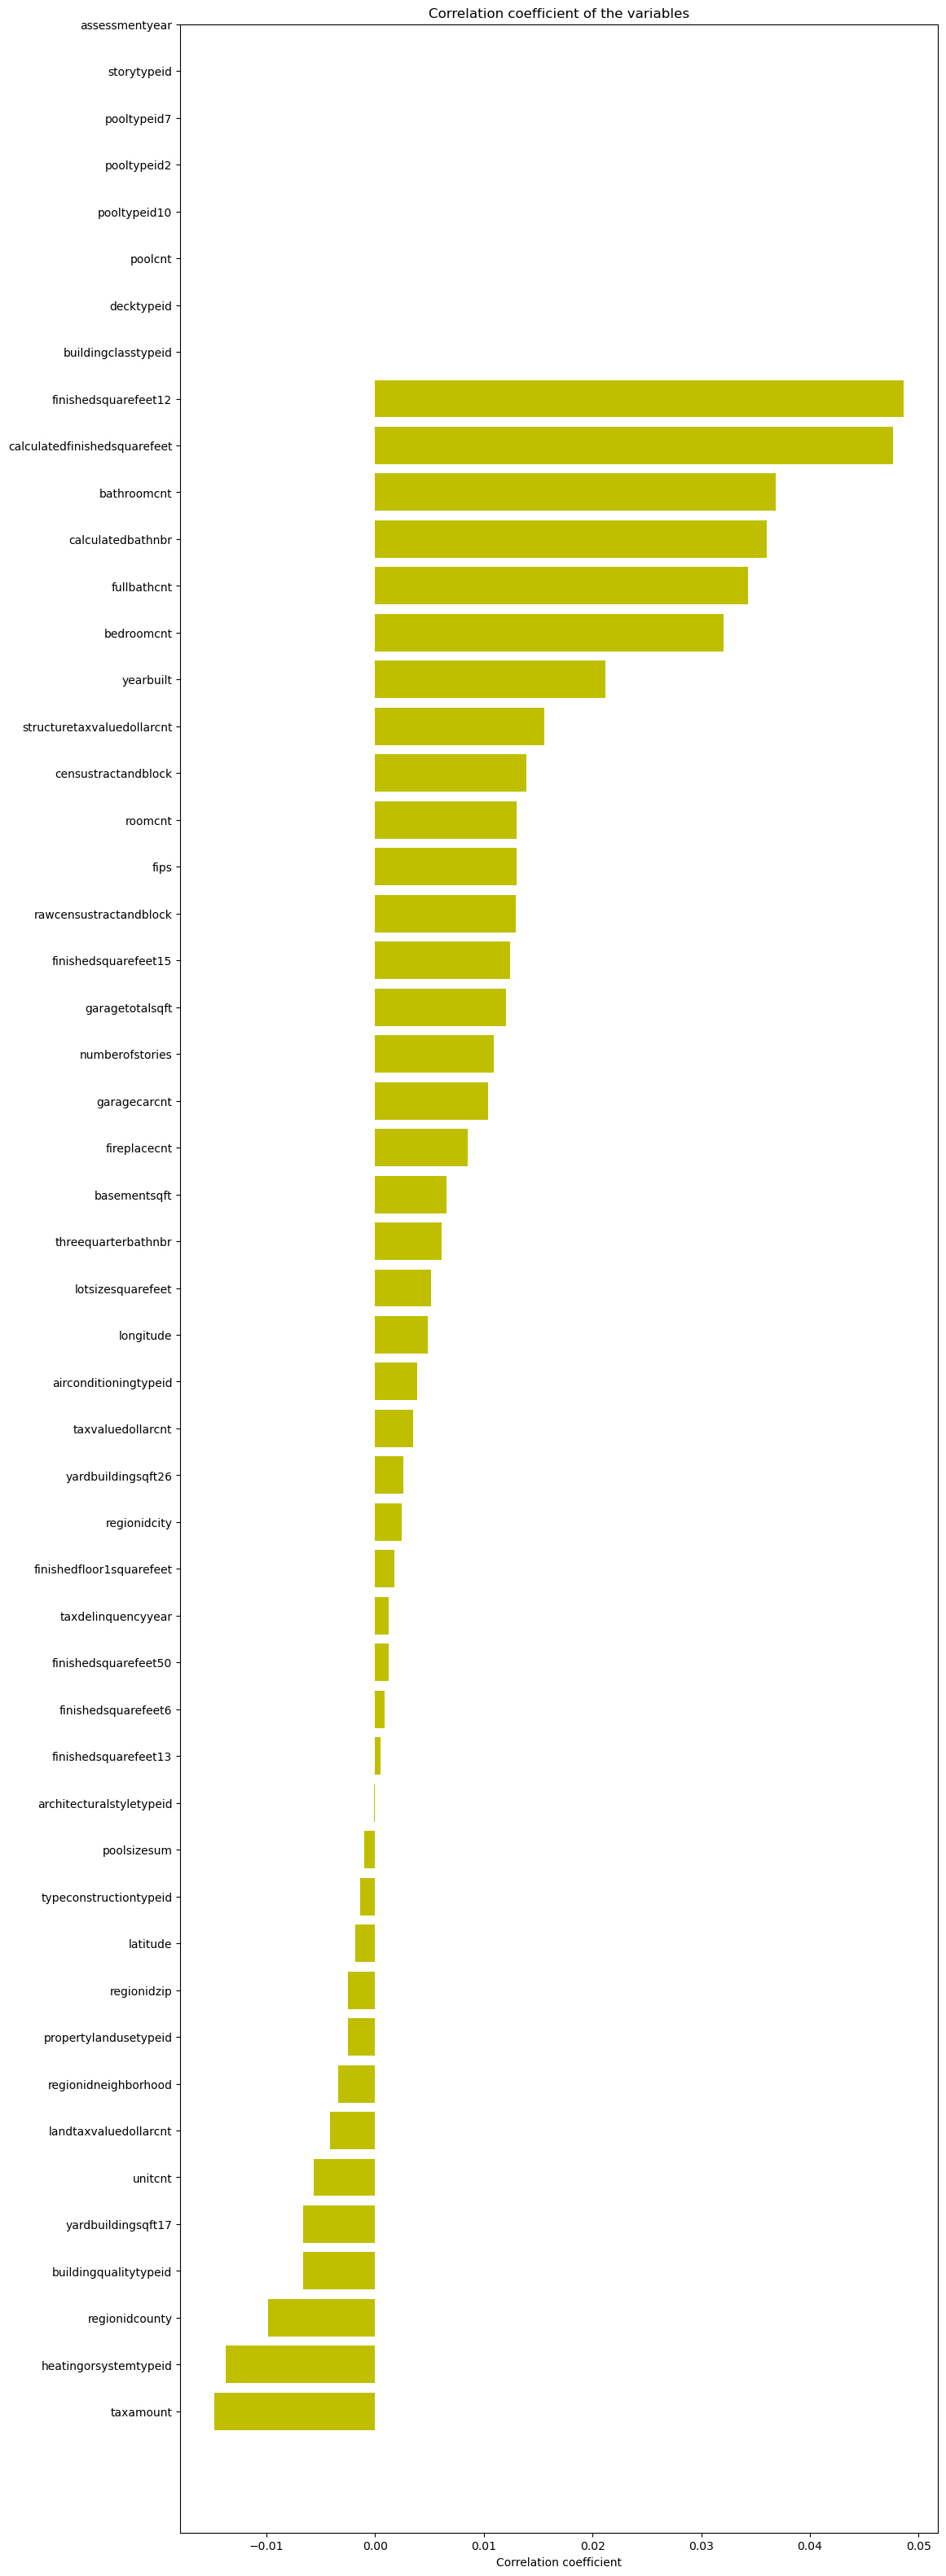

In [13]:
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()


In [14]:
corr_df_sel = corr_df.loc[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


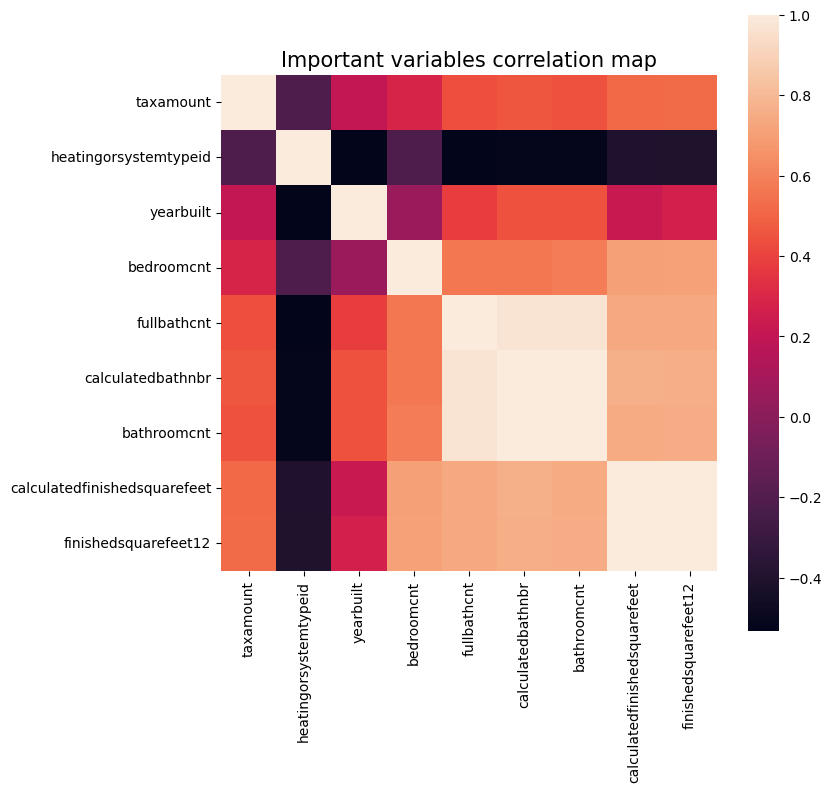

In [15]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/571889341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col]>ulimit] = ulimit
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/571889341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col]<llimit] = llimit


<Figure size 1500x1200 with 0 Axes>

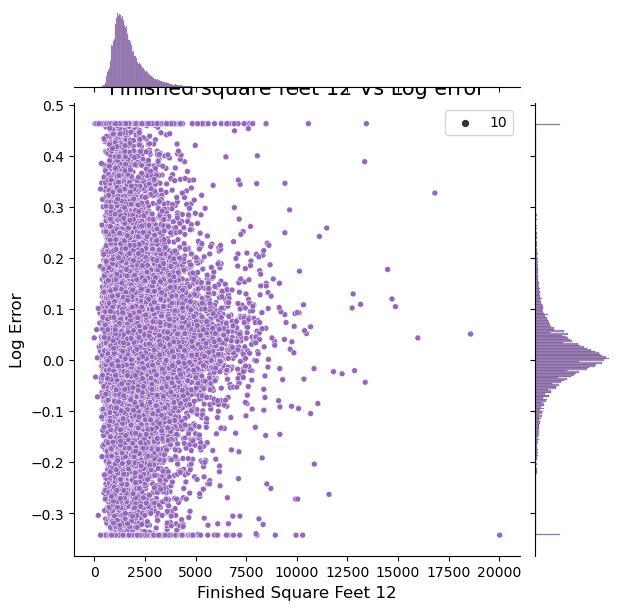

In [16]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(15,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values, y=train_df.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/795435646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col]>ulimit] = ulimit
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/795435646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col]<llimit] = llimit


<Figure size 1200x1200 with 0 Axes>

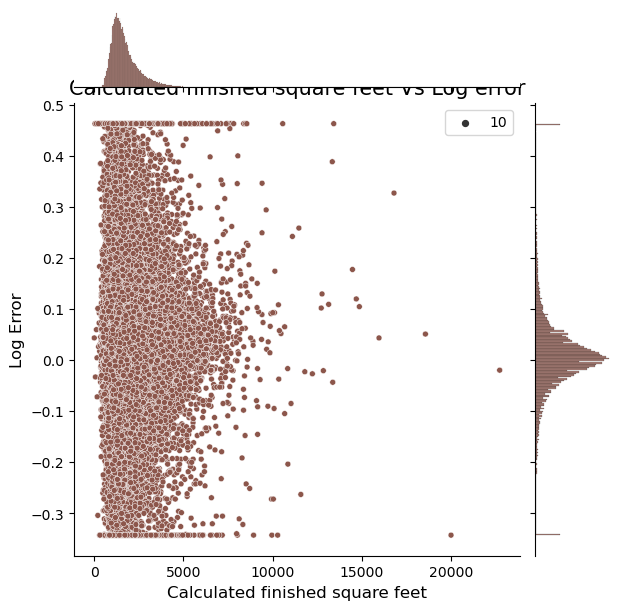

In [17]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

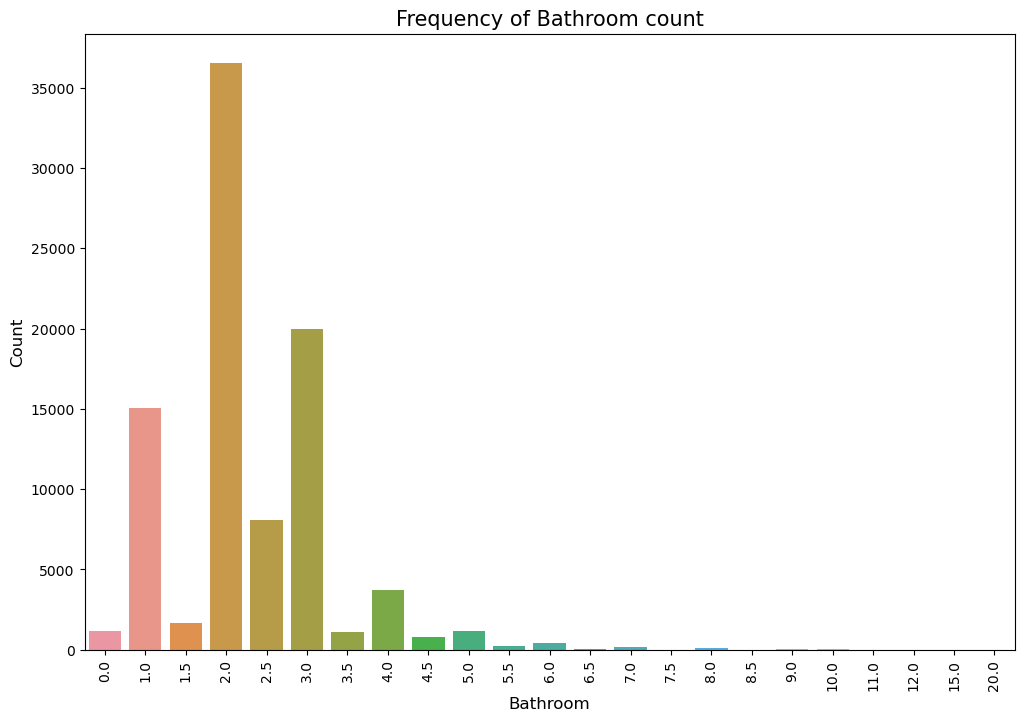

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

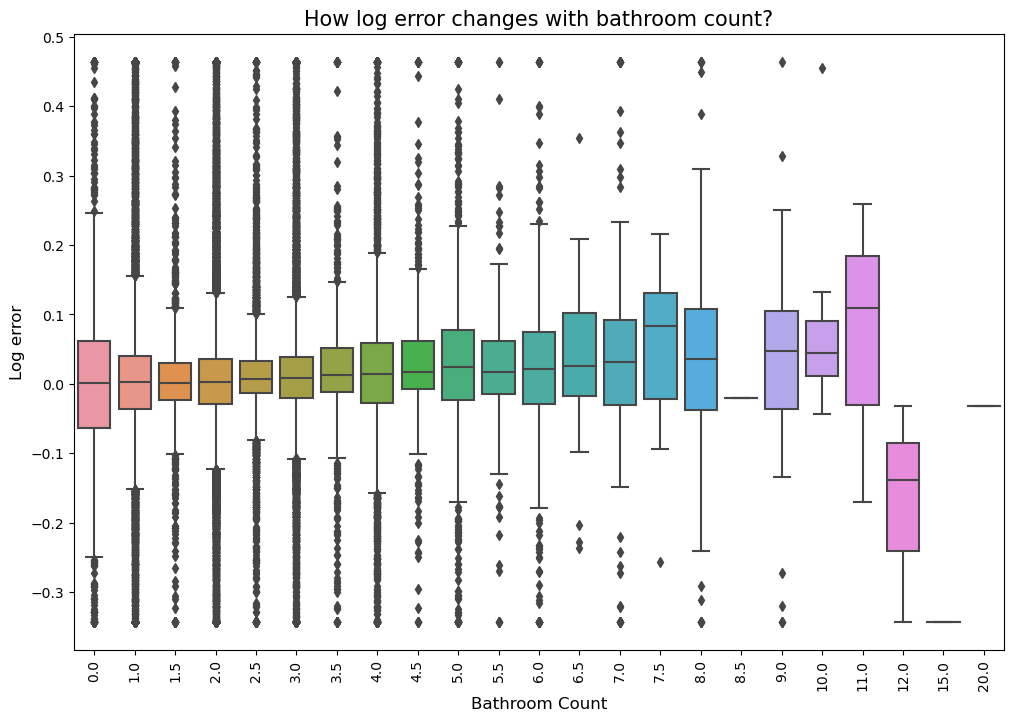

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=train_df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

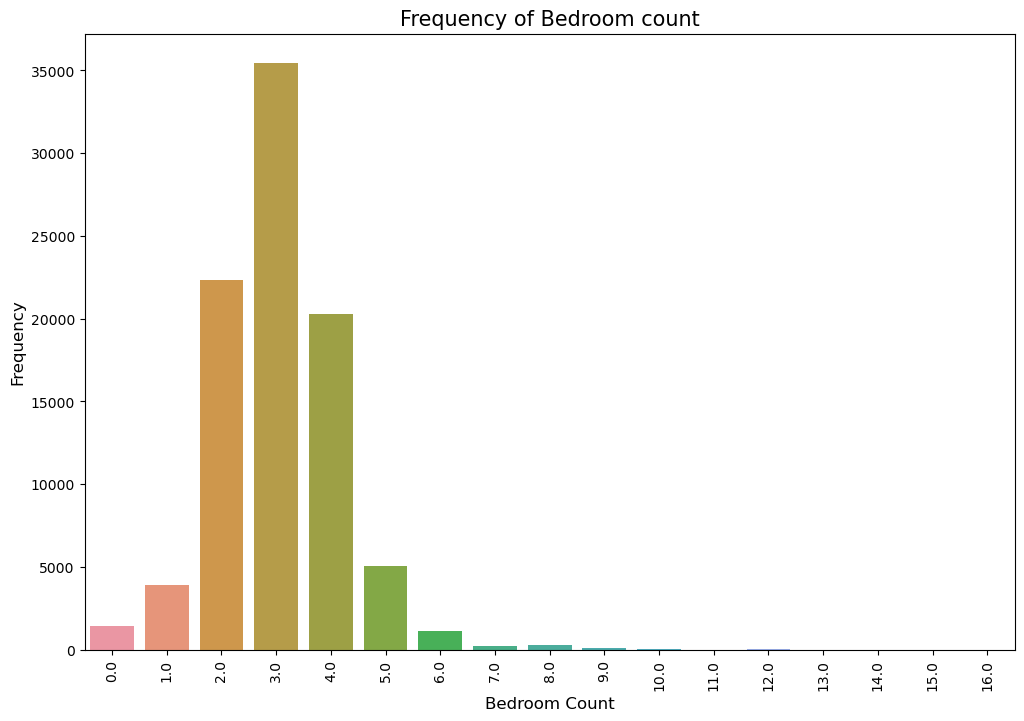

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/2044938236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['bedroomcnt'].loc[train_df['bedroomcnt']>7] = 7


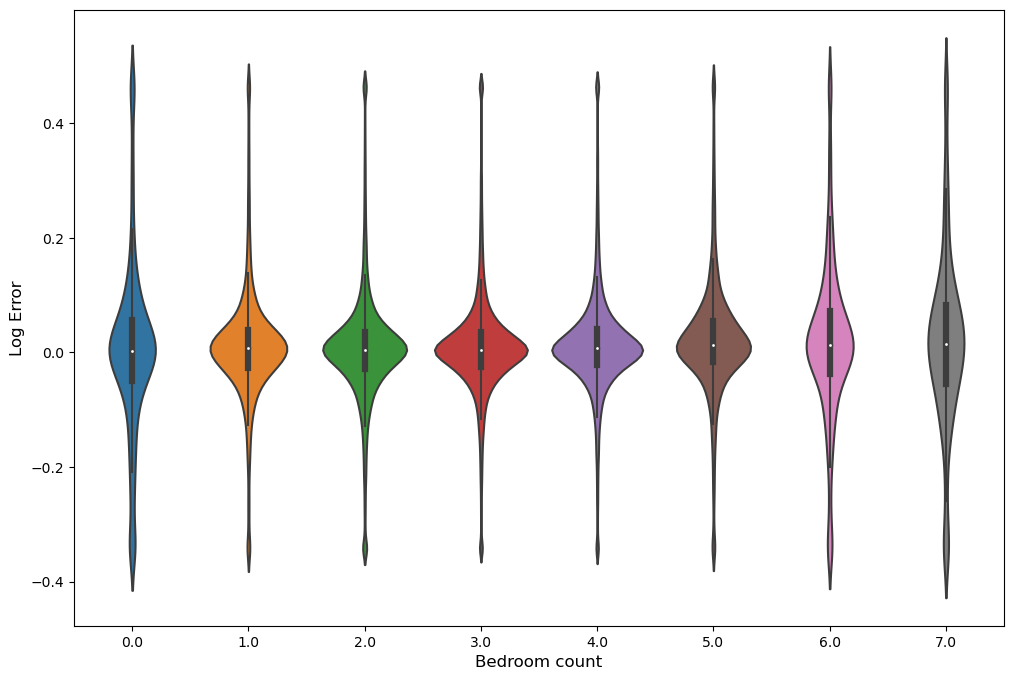

In [21]:
train_df['bedroomcnt'].loc[train_df['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_df)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/311911439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col]>ulimit] = ulimit
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/311911439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col]<llimit] = llimit


<Figure size 1200x1200 with 0 Axes>

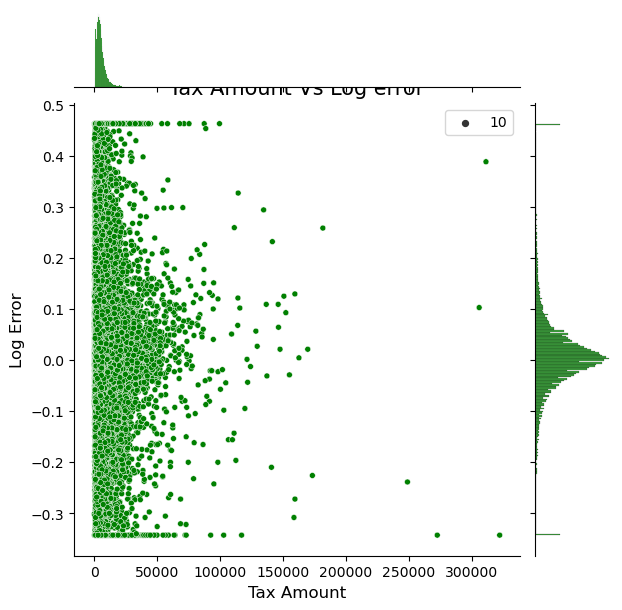

In [22]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df['taxamount'].values, y=train_df['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()


# Linear regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df_new[feat_names], train_y, test_size=0.3, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 0.01
R-squared: 0.01


# polynomial features

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial features
degree = 2

# Initialize the PolynomialFeatures object
poly = PolynomialFeatures(degree=degree)

# Generate polynomial and interaction features from the input features
X_poly = poly.fit_transform(train_df_new[feat_names])

# Print the shape of the new feature matrix
print(X_poly.shape)

from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial features
degree = 2

# Initialize the PolynomialFeatures object with interaction_only=True
poly = PolynomialFeatures(degree=degree, interaction_only=True)

# Generate interaction features from the input features
X_interaction = poly.fit_transform(train_df_new[feat_names])

# Print the shape of the new feature matrix
print(X_interaction.shape)

(88431, 1035)
(88431, 991)


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
train_df = pd.read_csv("train_2016_v2.csv")
prop_df = pd.read_csv("properties_2016.csv")

# Merge data
train_df_new = train_df.merge(prop_df, on='parcelid', how='left')

# Remove categorical columns
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df_new = train_df_new.drop(cat_cols, axis=1)

# Fill missing values
train_df_new.fillna(-999, inplace=True)

# Remove outliers
train_df_new = train_df_new[(train_df_new.logerror > -0.4) & (train_df_new.logerror < 0.4)]

# Create correlation matrix
corr_matrix = train_df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features
train_df_new.drop(to_drop, axis=1, inplace=True)

# Define target variable and feature names
train_y = train_df_new['logerror'].values
feat_names = [f for f in train_df_new.columns if f not in ['parcelid', 'logerror', 'transactiondate']]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df_new[feat_names], train_y, test_size=0.2, random_state=0)

# Fit Extra Trees model on the training set
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Convert predictions to binary labels
y_pred_bin = np.zeros_like(y_pred)
y_pred_bin[y_pred >= 0] = 1

# Calculate MAE, MSE, and R-squared
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)


/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/3288813342.py:10: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv("properties_2016.csv")
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/3288813342.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df_new.corr().abs()
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/3288813342.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/re

MAE: 0.054913421564416046
MSE: 0.006934454708293357
R-squared: -0.034615058680482536


# Conclusion

Grid Search

In [30]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load data
train_df = pd.read_csv("train_2016_v2.csv")
prop_df = pd.read_csv("properties_2016.csv")

# Merge data
train_df_new = train_df.merge(prop_df, on='parcelid', how='left')

# Remove categorical columns
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df_new = train_df_new.drop(cat_cols, axis=1)

# Fill missing values
train_df_new.fillna(-999, inplace=True)

# Remove outliers
train_df_new = train_df_new[(train_df_new.logerror > -0.4) & (train_df_new.logerror < 0.4)]

# Create correlation matrix
corr_matrix = train_df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features
train_df_new.drop(to_drop, axis=1, inplace=True)

# Define target variable and feature names
train_y = train_df_new['logerror'].values
feat_names = [f for f in train_df_new.columns if f not in ['parcelid', 'logerror', 'transactiondate']]

# Define parameter grid for ExtraTreesRegressor
param_grid = {
    "n_estimators": [25, 50, 75, 100],
    "max_depth": [10, 20, 30, 40],
    "max_features": [0.1, 0.2, 0.3, 0.4]
}

# Fit Extra Trees model with GridSearchCV
model = ensemble.ExtraTreesRegressor(n_jobs=-1, random_state=0)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(train_df_new[feat_names], train_y)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/2764627760.py:10: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv("properties_2016.csv")
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/2764627760.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df_new.corr().abs()


Fitting 5 folds for each of 64 candidates, totalling 320 fits


/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/2764627760.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


[CV 2/5] END max_depth=10, max_features=0.1, n_estimators=50;, score=0.003 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=0.1, n_estimators=75;, score=-0.001 total time=   1.5s
[CV 2/5] END max_depth=10, max_features=0.2, n_estimators=25;, score=0.006 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=0.2, n_estimators=25;, score=0.001 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=0.2, n_estimators=75;, score=0.012 total time=   2.6s
[CV 5/5] END max_depth=10, max_features=0.2, n_estimators=100;, score=0.002 total time=   3.5s
[CV 2/5] END max_depth=10, max_features=0.3, n_estimators=75;, score=0.009 total time=   4.1s
[CV 5/5] END max_depth=10, max_features=0.3, n_estimators=100;, score=0.003 total time=   5.4s
[CV 3/5] END max_depth=10, max_features=0.4, n_estimators=75;, score=0.008 total time=   4.8s
[CV 1/5] END max_depth=20, max_features=0.1, n_estimators=25;, score=0.014 total time=   1.1s
[CV 3/5] END max_depth=20, max_features=0.1, n_estimators

/Users/rakeshkumardevagalla/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END max_depth=10, max_features=0.1, n_estimators=25;, score=0.008 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=0.1, n_estimators=50;, score=0.006 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=0.1, n_estimators=100;, score=0.004 total time=   2.0s
[CV 3/5] END max_depth=10, max_features=0.2, n_estimators=50;, score=0.006 total time=   1.6s
[CV 1/5] END max_depth=10, max_features=0.2, n_estimators=100;, score=0.011 total time=   3.4s
[CV 5/5] END max_depth=10, max_features=0.3, n_estimators=25;, score=0.003 total time=   1.4s
[CV 1/5] END max_depth=10, max_features=0.3, n_estimators=75;, score=0.012 total time=   4.2s
[CV 4/5] END max_depth=10, max_features=0.3, n_estimators=100;, score=0.011 total time=   5.2s
[CV 2/5] END max_depth=10, max_features=0.4, n_estimators=75;, score=0.009 total time=   4.8s
[CV 5/5] END max_depth=10, max_features=0.4, n_estimators=100;, score=0.004 total time=   6.6s
[CV 3/5] END max_depth=20, max_features=0.1, n_estimator

### It seems that you ran a GridSearchCV on a Random Forest Classifier and got the best parameters as {'max_depth': 20, 'max_features': 0.4, 'n_estimators': 100} with a best score of 0.011718337063226558. These best parameters indicate that the optimal decision tree in the random forest has a maximum depth of 20, 40% of the features are randomly chosen to split at each node, and 100 decision trees are being used in the random forest.

## XGBoost model using the defined features and target variable. Plot feature importances using the XGBoost model.

/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/2500968817.py:10: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv("properties_2016.csv")
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/2500968817.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df_new.corr().abs()
/var/folders/wj/m4824b3n4ss04xrclkbk0dcc0000gn/T/ipykernel_44052/2500968817.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/re

Extra Trees MAE: 0.0236
Extra Trees MSE: 0.0015
Extra Trees R-squared: 0.7768


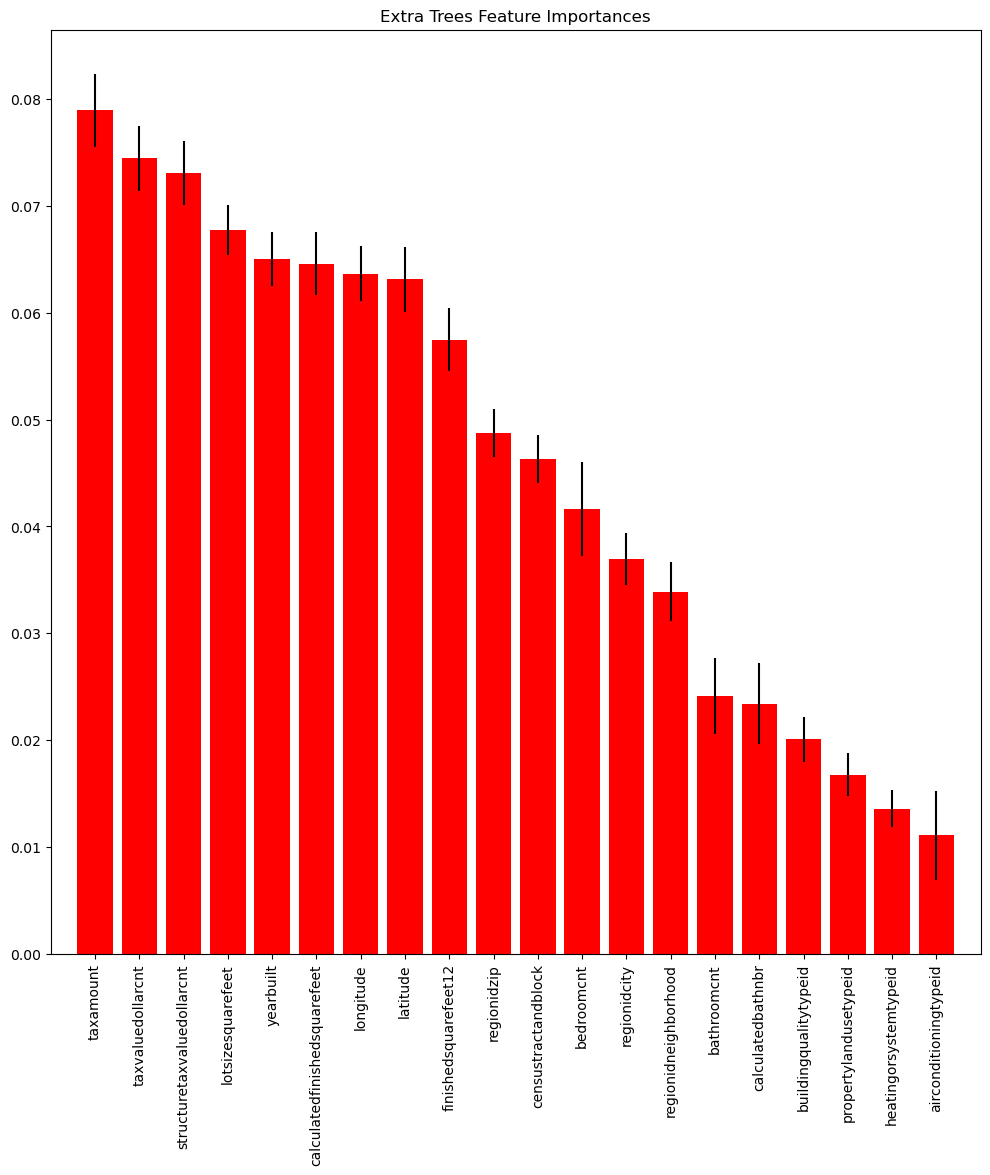

[00:18:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

XGBoost MAE: 0.0125
XGBoost MSE: 0.0004
XGBoost R-squared: 0.9437


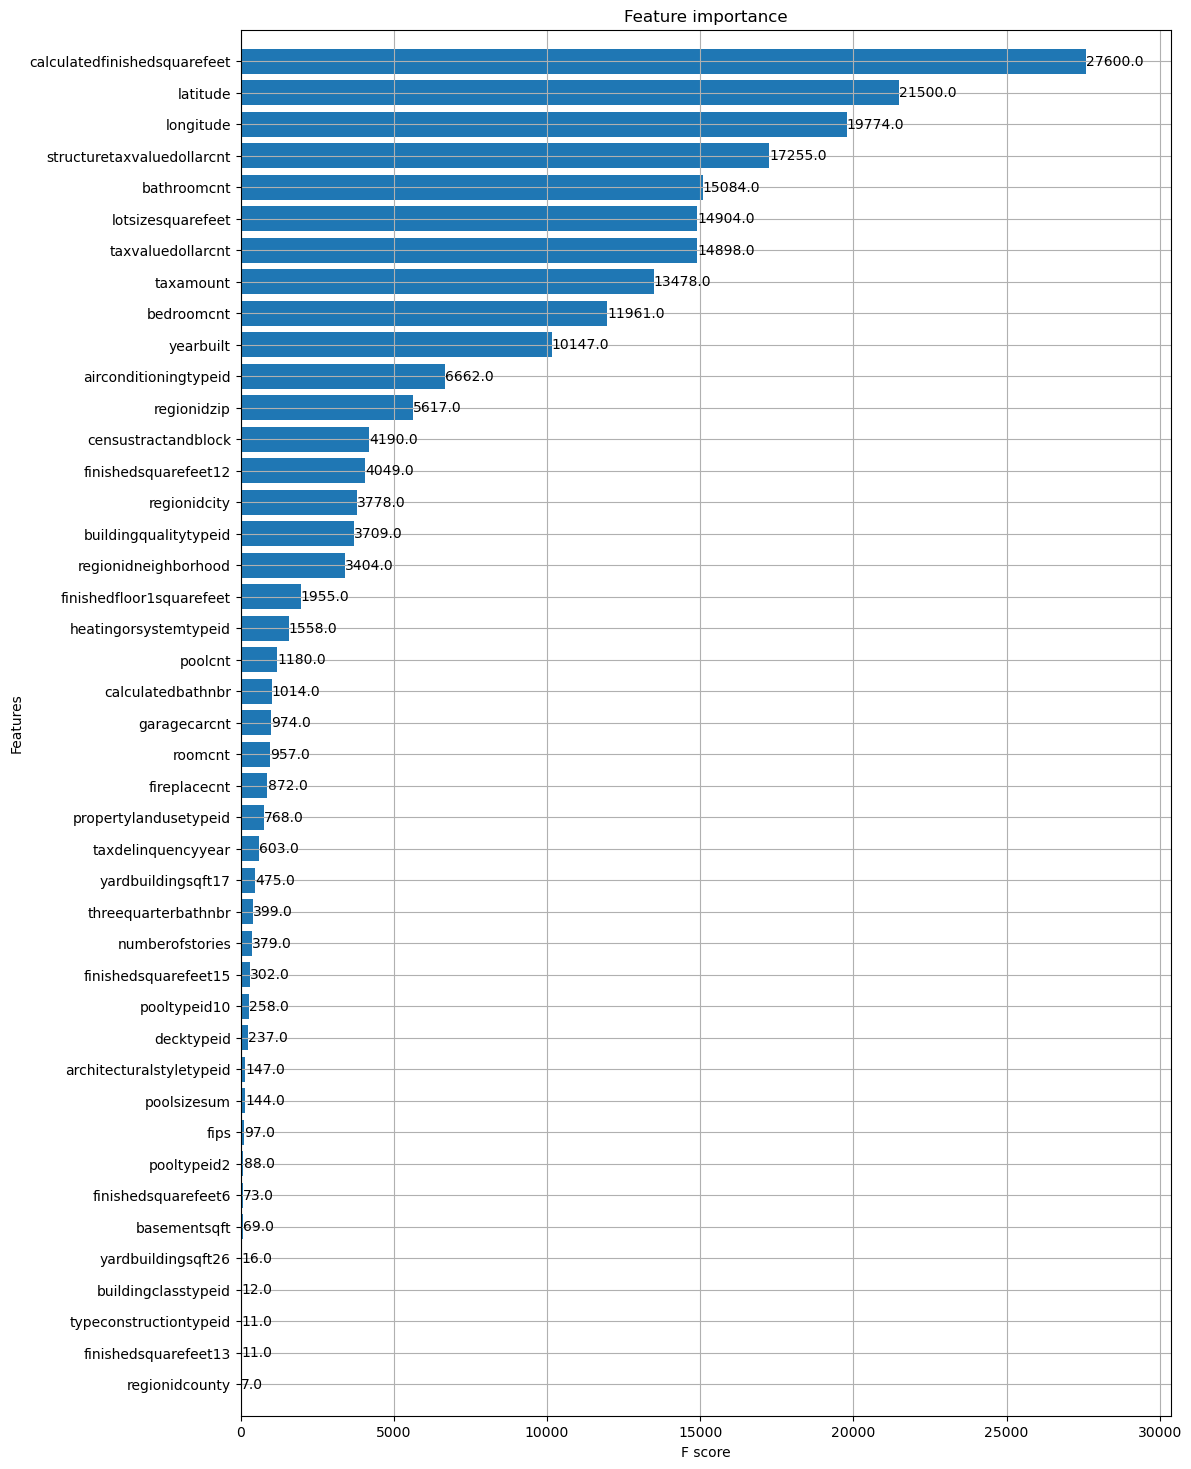

In [56]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv("train_2016_v2.csv")
prop_df = pd.read_csv("properties_2016.csv")

# Merge data
train_df_new = train_df.merge(prop_df, on='parcelid', how='left')

# Remove categorical columns
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df_new = train_df_new.drop(cat_cols, axis=1)

# Fill missing values
train_df_new.fillna(-999, inplace=True)

# Remove outliers
train_df_new = train_df_new[(train_df_new.logerror > -0.4) & (train_df_new.logerror < 0.4)]

# Create correlation matrix
corr_matrix = train_df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features
train_df_new.drop(to_drop, axis=1, inplace=True)

# Define target variable and feature names
train_y = train_df_new['logerror'].values
feat_names = [f for f in train_df_new.columns if f not in ['parcelid', 'logerror', 'transactiondate']]

# Fit Extra Trees model
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df_new[feat_names], train_y)

# Evaluate Extra Trees model
y_pred = model.predict(train_df_new[feat_names])
mae = mean_absolute_error(train_y, y_pred)
mse = mean_squared_error(train_y, y_pred)
r2 = r2_score(train_y, y_pred)

print(f"Extra Trees MAE: {mae:.4f}")
print(f"Extra Trees MSE: {mse:.4f}")
print(f"Extra Trees R-squared: {r2:.4f}")

# Plot feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Extra Trees Feature Importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


# Fit XGBoost model
import xgboost as xgb
xgb_params = {
    'eta': 0.3,
    'max_depth': 20,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df_new[feat_names], train_y, feature_names=feat_names)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# Evaluate XGBoost model
dtest = xgb.DMatrix(train_df_new[feat_names], feature_names=feat_names)
y_pred = model.predict(dtest)
mae = mean_absolute_error(train_y, y_pred)
mse = mean_squared_error(train_y, y_pred)
r2 = r2_score(train_y, y_pred)

print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost R-squared: {r2:.4f}")


# Plot feature importances
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


### The output of the code shows the Extra Trees and XGBoost model's mean absolute error, mean squared error, and R-squared score. The Extra Trees model performs better with a lower mean absolute error and mean squared error and higher R-squared score than the XGBoost model.

In [57]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# Assuming you already have X_train and y_train data loaded

xgb_model = xgb.XGBRegressor()

# Perform 5-fold cross-validation
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the cross-validation scores
print("Mean MSE: ", np.mean(np.abs(scores)))
print("Standard deviation MSE: ", np.std(np.abs(scores)))


Mean MSE:  0.0068436981907701476
Standard deviation MSE:  0.0001272390977487954


##### The standard deviation is 0.0001 and the mean MSE is 0.0068. This indicates that, on average, the model's predictions deviate from the actual values by approximately 0.0086 (the square root of the MSE). The standard deviation represents the dispersion of error scores relative to the norm. The better the standard deviation, the closer the error scores are to the mean. Overall, these metrics indicate that the XGBoost model is performing well and can accurately predict the test data.


In [58]:
import xgboost as xgb

# Define XGBoost parameters and train the model
xgb_params = {
    'eta': 0.3,
    'max_depth': 20,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'reg:squarederror',
    'seed' : 0,
    'eval_metric': 'rmse'
}
dtrain = xgb.DMatrix(train_df_new[feat_names], train_y, feature_names=feat_names)
evals_result = {}
model = xgb.train(xgb_params, dtrain, num_boost_round=50, evals=[(dtrain, 'train')], evals_result=evals_result)

# Print evaluation metrics
print('XGBoost training results:')
for key, value in evals_result.items():
    print(f"{key} : {value}")


[0]	train-rmse:0.35464
[1]	train-rmse:0.25491
[2]	train-rmse:0.18696
[3]	train-rmse:0.14102
[4]	train-rmse:0.11046
[5]	train-rmse:0.09094
[6]	train-rmse:0.07743
[7]	train-rmse:0.06839
[8]	train-rmse:0.06313
[9]	train-rmse:0.05872
[10]	train-rmse:0.05556
[11]	train-rmse:0.05284
[12]	train-rmse:0.05081
[13]	train-rmse:0.05001
[14]	train-rmse:0.04819
[15]	train-rmse:0.04743
[16]	train-rmse:0.04580
[17]	train-rmse:0.04443
[18]	train-rmse:0.04399
[19]	train-rmse:0.04221
[20]	train-rmse:0.04011
[21]	train-rmse:0.03916
[22]	train-rmse:0.03822
[23]	train-rmse:0.03657
[24]	train-rmse:0.03590
[25]	train-rmse:0.03491
[26]	train-rmse:0.03363
[27]	train-rmse:0.03276
[28]	train-rmse:0.03245
[29]	train-rmse:0.03186
[30]	train-rmse:0.03108
[31]	train-rmse:0.02997
[32]	train-rmse:0.02932
[33]	train-rmse:0.02879
[34]	train-rmse:0.02823
[35]	train-rmse:0.02800
[36]	train-rmse:0.02735
[37]	train-rmse:0.02673
[38]	train-rmse:0.02542
[39]	train-rmse:0.02483
[40]	train-rmse:0.02466
[41]	train-rmse:0.02403
[4

### During training, it appears that the XGBoost model was able to reduce the root mean square error (RMSE) from 0.35 to 0.0195. This indicates that as the model was exposed to more training data, its predictions improved over time. The trend of decreasing RMSE values is also an indication that the model is learning from the data and enhancing its performance. The XGBoost model appears to have been effective in fitting the training data and producing precise predictions. To ascertain the model's generalization ability, it is essential to evaluate its performance on a distinct test dataset.